<a href="https://colab.research.google.com/github/nishio/mot/blob/master/DisruptiveInnovation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Disruptive innovation can occur even if technology progresses gradually
This script is to reproduce figures in the paper of ISPIM CONNECTS FUKUOKA 2018 (2018-12-05).

You can run the codes step-by-step on your web browser (using a service Google Colaboratory) or modify the codes to run your experiments. Press "Open in Colab" button above.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from math import log, exp

# time resolution                                                                                                                          
TIME_RESOLUTION = 20

# resolution on finding maximal value                                                                                                      
RESOLUTION = 100

# default contour plot size
CONTOUR_SIZE = 10

## Model Structure
### Utility curves / The law of diminishing marginal utility


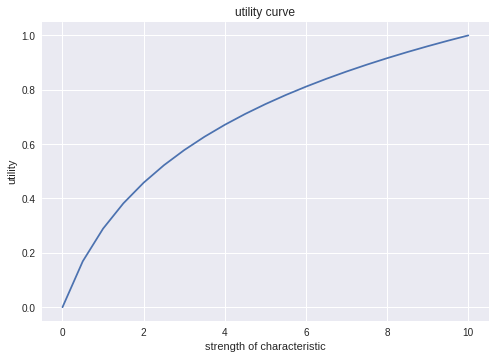

In [2]:
class Diminishing(object):
    def __init__(self, offset=0, vscale=1, hscale=1, normalize=False):
        self.offset = offset
        self.vscale = vscale
        self.hscale = hscale
        self.ufunc = np.frompyfunc(
            (lambda x: log((x - self.offset) / self.hscale + 1) * self.vscale / log((10 - self.offset) / self.hscale + 1)),
            1, 1)
        if normalize:
            self.vscale *= 1 / self.ufunc(10)

    def __call__(self, x):
        return self.ufunc(x)

    def __repr__(self):
        result = "dim_o" + str(self.offset)
        if self.vscale != 1:
            result += "v" + str(self.vscale)
        if self.hscale != 1:
            result += "h" + str(self.hscale)
        return result

def draw_single_utility(
    f, filename="last.png", MAX_X=10,
    xlabel='strength of characteristic'):
    plt.clf()
    ax = plt.gca()
    xs = np.linspace(0, MAX_X, TIME_RESOLUTION + 1)
    line, = ax.plot(xs, f(xs))

    ax.set_xlabel(xlabel)
    ax.set_ylabel('utility')
    plt.title('utility curve')
    plt.savefig(filename)
    return line

dim = Diminishing()
draw_single_utility(dim)

### Indifference curves and their convexity

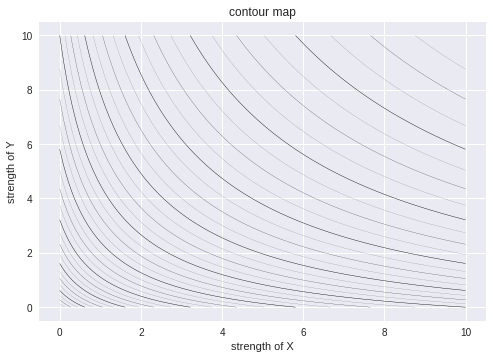

In [3]:
def large_contour_chart(ax, fx, fy, xs, ys, MAX_X, MAX_Y):
    # contour resolution: split from 0 to 4 into 80 levels                                                                                 
    NUM_LEVELS = 80
    LEVELS = np.array(range(NUM_LEVELS)) / float(NUM_LEVELS) * 4
    STYLE_FOR_CONTOUR = dict(
        levels=LEVELS, colors='black',
        linewidths=[0.1, 0.2, 0.1, 0.4])

    x = np.linspace(0, MAX_X, RESOLUTION)
    y = np.linspace(0, MAX_X, RESOLUTION)
    X, Y = np.meshgrid(x, y)
    Z = fx(X) +  fy(Y)
    ax.contour(X, Y, Z, **STYLE_FOR_CONTOUR)

    ax.set_xlabel('strength of X')
    ax.set_ylabel('strength of Y')
    plt.title('contour map')

    ax.plot(
        xs, ys,
        marker='o', markeredgecolor='red', markeredgewidth=1,
        markerfacecolor='white', linestyle='-', color='red')

    OFFSET = 0.05 * MAX_X  # small offset for better graph                                                                                 
    ax.set_xlim(-OFFSET, MAX_X + OFFSET)
    ax.set_ylim(-OFFSET, MAX_X + OFFSET)


def draw_contour_wo_path(fx, fy, MAX_X=CONTOUR_SIZE, MAX_Y=CONTOUR_SIZE, filename='last.png'):
    """                                                                                                                                    
    draw one contour chart without path                                                                                                    
    for explanation on paper                                                                                                               
    """
    plt.clf()
    ax = plt.gcf().add_subplot(1, 1, 1)
    large_contour_chart(ax, fx, fy, [], [], MAX_X, MAX_Y)
    return plt.gca()
  
draw_contour_wo_path(dim, dim)

### S-curved utility function

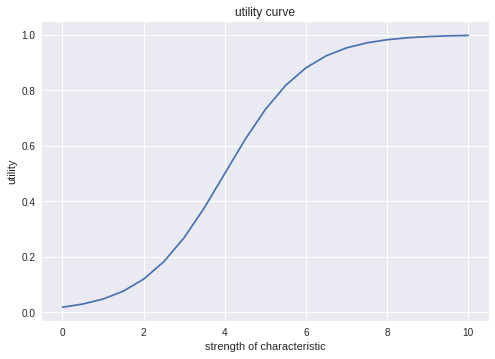

In [4]:
class Sigmoid(object):
    def __init__(self, offset, vscale=1, hscale=1):
        self.offset = offset
        self.vscale = vscale
        self.hscale = hscale

    def __call__(self, x):
        return self.vscale / (1 + np.exp(- x  / self.hscale + self.offset))

    def __repr__(self):
        result = "sig_o" + str(self.offset)
        if self.vscale != 1:
            result += "v" + str(self.vscale)
        if self.hscale != 1:
            result += "h" + str(self.hscale)
        return result

sig = Sigmoid(4)
draw_single_utility(sig)

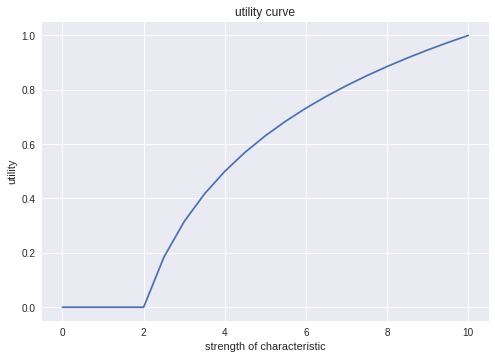

In [5]:
class AdnerSCurve(object):
    def __init__(self, offset, vscale=1, hscale=1, normalize=False):
        self.offset = offset
        self.vscale = vscale
        self.hscale = hscale
        self.ufunc = np.frompyfunc(
            (lambda x:
             0.0 if x <= self.offset else
             log(1 + (x - self.offset) / self.hscale) * self.vscale),
            1, 1)
        if normalize:
            self.vscale *= 1 / self.ufunc(10)

    def __call__(self, x):
        return self.ufunc(x)

    def __repr__(self):
        result = "adns_o" + str(self.offset)
        if self.vscale != 1:
            result += "v" + str(self.vscale)
        if self.hscale != 1:
            result += "h" + str(self.hscale)
        return result

ads = AdnerSCurve(2, normalize=True)
draw_single_utility(ads)

## Experiments and result

### Utility curves which follow the law of diminishing marginal utility

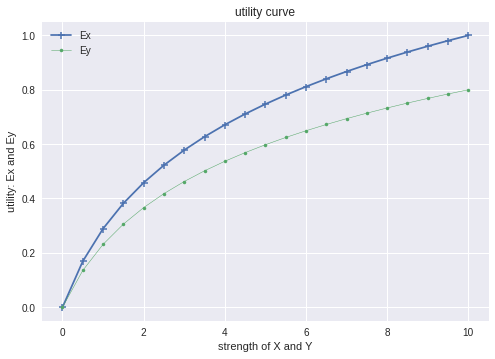

In [6]:
# line style for charts                                                                                                                    
STYLE_FOR_X = dict(marker='+', markeredgewidth=1.5, linestyle='-')
STYLE_FOR_Y = dict(linewidth=0.5, marker='.', linestyle='-')

def large_utility_chart(fx, fy, MAX_X=CONTOUR_SIZE, MAX_Y=CONTOUR_SIZE):
    ax = plt.gca()
    xs = np.linspace(0, MAX_X, TIME_RESOLUTION + 1)
    ys = np.linspace(0, MAX_Y, TIME_RESOLUTION + 1)
    line_fx, = ax.plot(xs, fx(xs), label='Ex', **STYLE_FOR_X)
    if fy:
        line_fy, = ax.plot(ys, fy(ys), label='Ey', **STYLE_FOR_Y)

    if max(fy(ys)) <= 1.0:
        ax.set_ylim(-0.05, 1.05)
    if fy:
        plt.legend([line_fx, line_fy], ["Ex", "Ey"], loc=2)
    else:
        plt.legend([line_fx], ["Ex"], loc=2)

    ax.set_xlabel('strength of X and Y')
    ax.set_ylabel('utility: Ex and Ey')
    plt.title('utility curve')

def draw_utility(fx, fy, MAX_X=CONTOUR_SIZE, MAX_Y=CONTOUR_SIZE):
    """                                                                                                                                    
    draw one utility curve                                                                                                                 
    """
    plt.clf()
    ax = plt.gcf().add_subplot(1, 1, 1)
    large_utility_chart(fx, fy, MAX_X, MAX_Y)
    return ax
    
dim1 = Diminishing()
dim2 = Diminishing(vscale=0.8)
draw_utility(dim1, dim2)

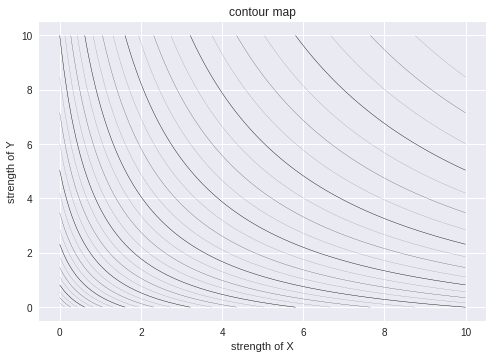

In [7]:
draw_contour_wo_path(dim1, dim2)

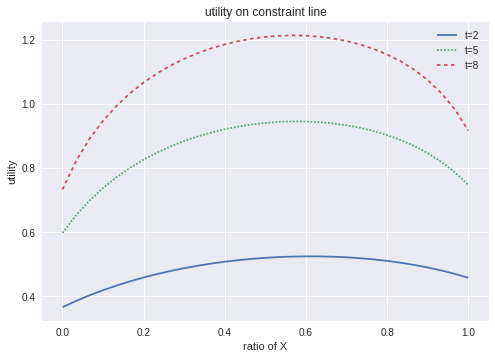

In [8]:
def draw_utility_on_border(fx, fy, ts, linestyles):
    plt.clf()
    lines = []
    labels = []
    for i, t in enumerate(ts):
        xs = np.linspace(0, t, 31)
        ys = t - xs
        us = fx(xs) + fy(ys)
        label = "t={}".format(t)
        line, = plt.plot(xs / t, us, linestyle=linestyles[i], label=label)
        lines.append(line)
        labels.append(label)

    plt.legend(lines, labels, loc=1)
    ax = plt.gca()
    ax.set_xlabel("ratio of X")
    ax.set_ylabel("utility")
    plt.title("utility on constraint line")

    return ax

draw_utility_on_border(
    dim1, dim2, 
    [2, 5, 8], [(0, ()), (0, (1, 1)), (0, (2, 2))])

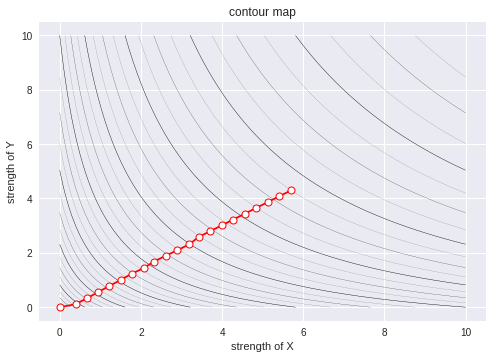

In [9]:
def find_max_path(fx, fy, MAX_X, MAX_Y):
    """find maximal value subject to constrain `x + y = t`"""
    assert MAX_X == MAX_Y
    dt = MAX_X / float(TIME_RESOLUTION)
    xs = [0]
    ys = [0]
    for i in range(TIME_RESOLUTION):
        t = (i + 1) * dt
        buf = []
        for j in range(RESOLUTION + 1):
            nx = t / RESOLUTION * j
            ny = t * (RESOLUTION - j) / RESOLUTION
            s = fx(nx) + fy(ny)
            buf.append((s, (nx, ny)))

        # find best one                                                                                                                    
        best_s, (best_x, best_y) = max(buf)
        xs.append(best_x)
        ys.append(best_y)
    return xs, ys

def draw_contour(fx, fy, MAX_X=CONTOUR_SIZE, MAX_Y=CONTOUR_SIZE, filename='last.png'):
    """                                                                                                                                    
    draw one contour chart                                                                                                                 
    """
    plt.clf()
    xs, ys = find_max_path(fx, fy, MAX_X, MAX_Y)
    ax = plt.gcf().add_subplot(1, 1, 1)
    large_contour_chart(ax, fx, fy, xs, ys, MAX_X, MAX_Y)
    return ax
  
draw_contour(dim1, dim2)

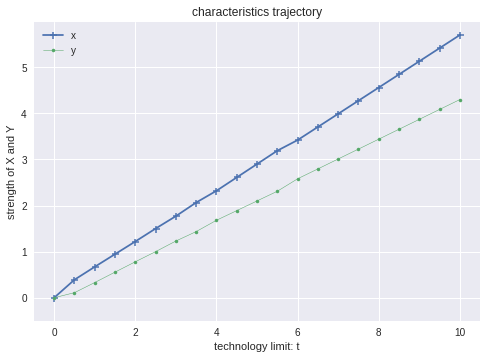

In [10]:
def large_trajectory_chart(ax, xs, ys, MAX_X, MAX_Y):
    ts = np.linspace(0, MAX_X, TIME_RESOLUTION + 1)

    line_xs, = ax.plot(ts, xs, label='x', **STYLE_FOR_X)
    line_ys, = ax.plot(ts, ys, label='y', **STYLE_FOR_Y)
    ax.set_ylim(-0.05 * MAX_X)  # small offset for better graph                                                                            
    plt.legend([line_xs, line_ys], ["x", "y"], loc=2)
    ax.set_xlabel('technology limit: t')
    ax.set_ylabel('strength of X and Y')
    plt.title('characteristics trajectory')

def draw_trajectory(fx, fy, MAX_X=CONTOUR_SIZE, MAX_Y=CONTOUR_SIZE):
    """                                                                                                                                    
    draw one trajectory curve                                                                                                              
    """
    plt.clf()
    xs, ys = find_max_path(fx, fy, MAX_X, MAX_Y)
    ax = plt.gcf().add_subplot(1, 1, 1)
    large_trajectory_chart(ax, xs, ys, MAX_X, MAX_Y)
    return ax
  
draw_trajectory(dim1, dim2)

### Smooth S-curved utility curves (sigmoid)

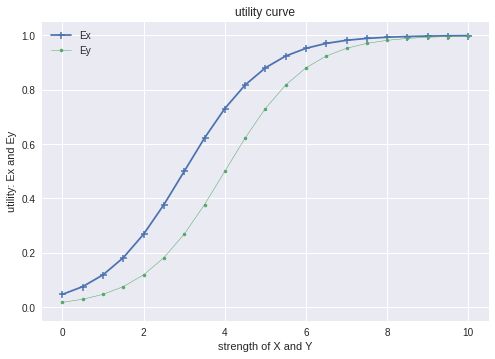

In [11]:
u1 = Sigmoid(3)
u2 = Sigmoid(4)
draw_utility(u1, u2)

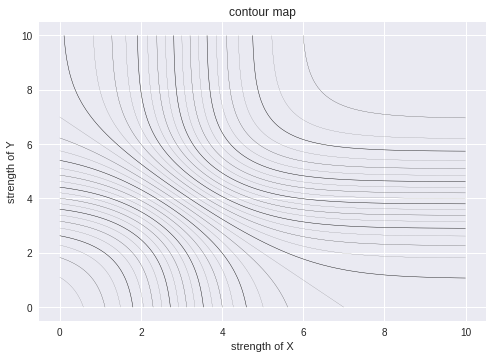

In [12]:
draw_contour_wo_path(u1, u2)

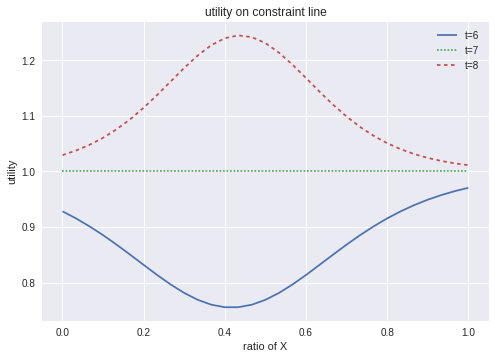

In [13]:
draw_utility_on_border(
    u1, u2,
    [6, 7, 8], [(0, ()), (0, (1, 1)), (0, (2, 2))])

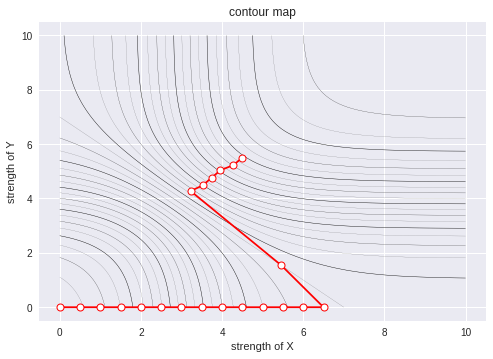

In [14]:
draw_contour(u1, u2)

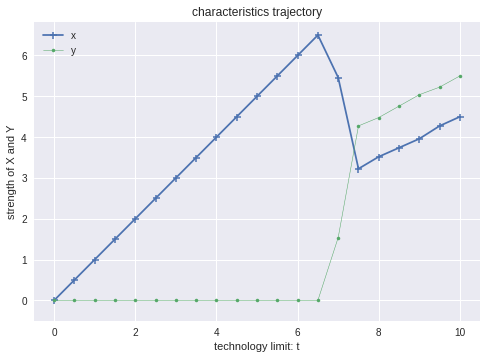

In [15]:
draw_trajectory(u1, u2)

### Utility curve with threshold

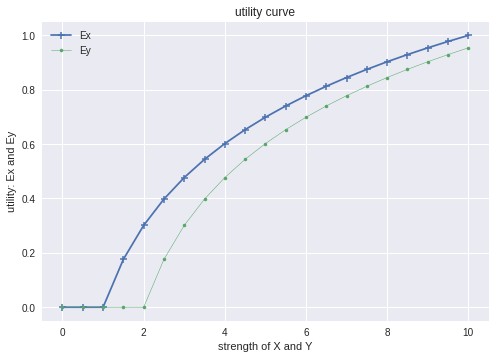

In [16]:
u1 = AdnerSCurve(1, normalize=True)
u2 = AdnerSCurve(2, vscale=u1.vscale)
draw_utility(u1, u2)

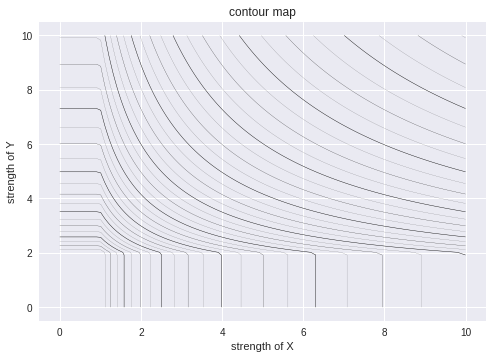

In [17]:
draw_contour_wo_path(u1, u2)

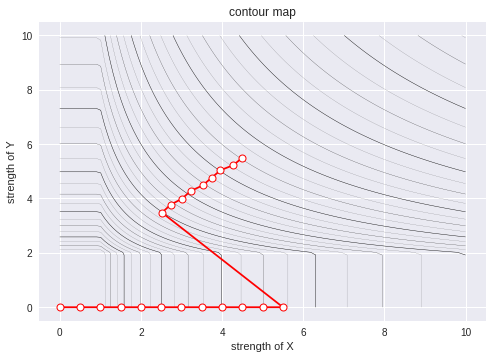

In [18]:
draw_contour(u1, u2)

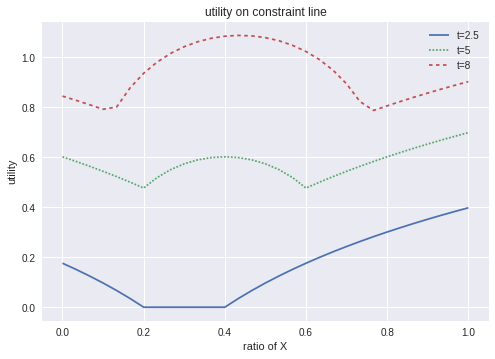

In [19]:
draw_utility_on_border(
            u1, u2,
            [2.5, 5, 8], [(0, ()), (0, (1, 1)), (0, (2, 2))])

### Quadratic function approximation of utility

Text(0.5,1,'utility curve')

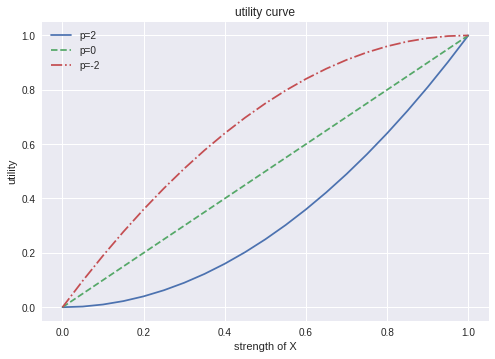

In [20]:
class Quad(object):
    """                                                                                                                                    
    quadratic curve, whose second order differential == sod.                                                                               
    It passes (0, 0) and (1, when1).                                                                                                       
    """
    def __init__(self, sod, when1=1.0, hscale=1.0):
        self.sod = float(sod)
        self.when1 = float(when1)  # value when x=1                                                                                        
        self.hscale = hscale

    def __call__(self, x):
        x = x / self.hscale
        a = self.sod / 2.0
        b = self.when1 - a
        return a * x * x + b * x

    def __repr__(self):
        result = "quad_k" + str(self.sod)
        if self.when1 != 1:
            result += "w" + str(self.when1)
        return result


c1 = Quad(2)
c2 = Quad(0)
c3 = Quad(-2)
ax = plt.gca()
lines = []
for i, f in enumerate([c1, c2, c3]):
    xs = np.linspace(0, CONTOUR_SIZE, TIME_RESOLUTION + 1) / CONTOUR_SIZE
    line, = ax.plot(xs, f(xs), linestyle=["-", "--", "-."][i])
    lines.append(line)

plt.legend(lines, ["p=2", "p=0", "p=-2"], loc=2)

ax.set_xlabel('strength of X')
ax.set_ylabel('utility')
plt.title('utility curve')

### The sign of the second derivative

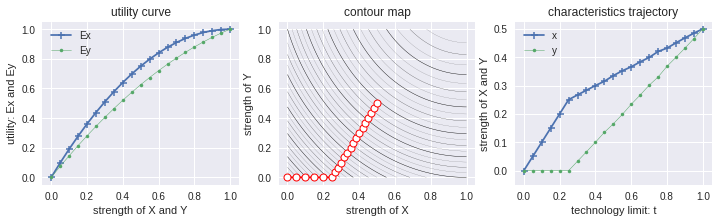

In [21]:
def draw_trio(fx, fy, MAX_X=10, MAX_Y=10, MAX_TIME=10, filename='last.png'):
    """                                                                                                                                    
    draw utility, contour and trajectory in one file                                                                                       
    """
    fig = plt.figure(figsize=(10, 3))  # originally (20, 6) but it doesn't fit in Colab's screen width
    fig.subplots_adjust(left=0.05, right=0.98)
    plt.clf()
    xs, ys = find_max_path(fx, fy, MAX_TIME, MAX_TIME)

    ax = fig.add_subplot(1, 3, 1)
    large_utility_chart(fx, fy, MAX_X, MAX_Y)

    ax = plt.gcf().add_subplot(1, 3, 2)
    large_contour_chart(ax, fx, fy, xs, ys, MAX_X, MAX_Y)

    ax = plt.gcf().add_subplot(1, 3, 3)
    large_trajectory_chart(ax, xs, ys, MAX_X, MAX_Y)
    plt.figure()  # recover figure aspect ratio
    return ax
  
draw_trio(Quad(-2), Quad(-1), 1, 1, 1, 'figs/quad1.png')

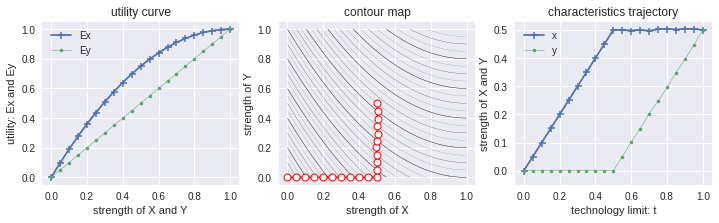

In [22]:
draw_trio(Quad(-2), Quad(0), 1, 1, 1)

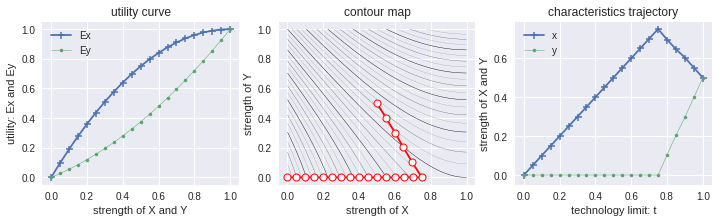

In [23]:
draw_trio(Quad(-2), Quad(1), 1, 1, 1)

### Speed of disruption

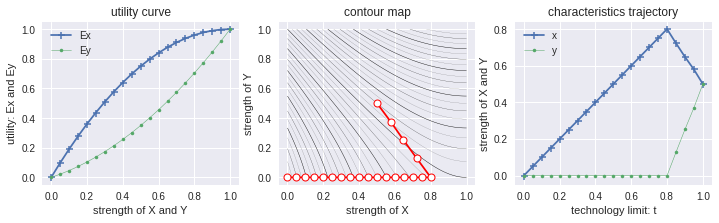

In [24]:
draw_trio(Quad(-2), Quad(1.2), 1, 1, 1)  # not in paper due to paper space

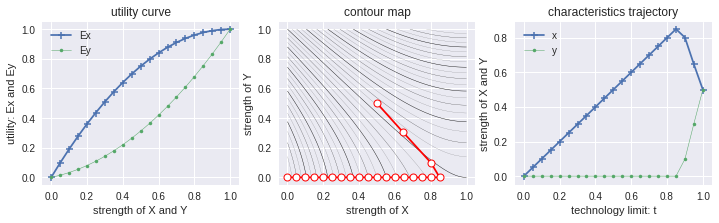

In [25]:
draw_trio(Quad(-2), Quad(1.5), 1, 1, 1)

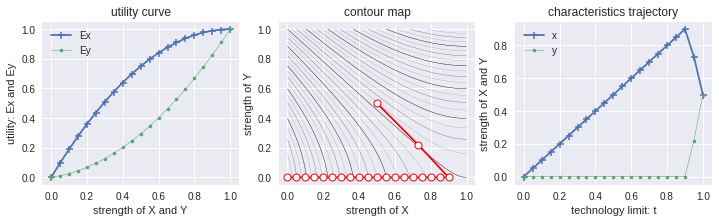

In [26]:
draw_trio(Quad(-2), Quad(1.65), 1, 1, 1)  # not in paper due to paper space

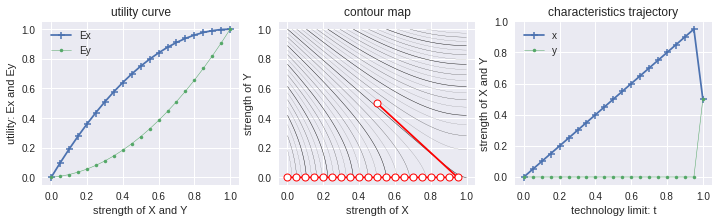

In [27]:
draw_trio(Quad(-2), Quad(1.8), 1, 1, 1)

### Citation
Hirokazu Nishio, Shuzo Fujimura 2018. Disruptive innovation can occur even if technology progresses gradually. Proceeding of ISPIM CONNECT FUKUOKA.